let's look at this code for plotting sinusoidal signals of the same frequency but with different amplitudes and phases and their pointwise product.
Data1 is a sinusoid at 440 hertz with amplitude of one and phase of zero.
Data2 is also a sinusoid at 440 hertz with arbitrary phase controlled by k. k is in units od sample and ge t converted to radians. The product plot function computes the pointwise product of two signals. It also plots the two signals and their pointwise product.Finally, in the loop at the bottom, plots of different phase relationships are shown.

In [53]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

# generate a discrete time sine signal with a specified amplitude, frequency, duration, and phase 
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

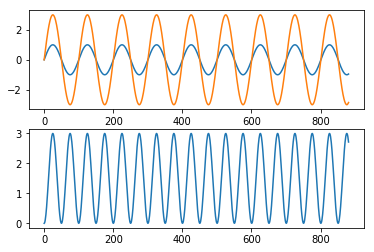

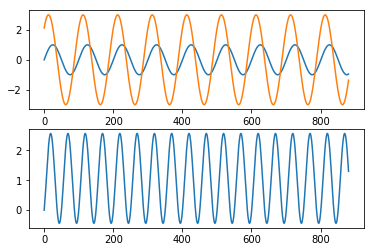

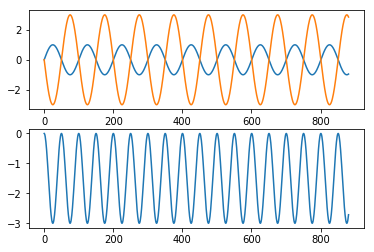

In [48]:
k = 0
srate = 8000
data1 = sinusoid(440, 0.02, phase= 0)
data2 = sinusoid(440, 0.02, amp = 3.0, phase = k * (2 * np.pi / srate))

def product_plot(data1, data2):
    mdata = np.multiply(data1,data2)
    plt.figure()
    plt.subplot(211)
    plt.plot(data1)
    plt.plot(data2)
    plt.subplot(212)
    plt.plot(mdata)
    
for k in [0, 1000, 4000]:
    data2 = sinusoid(440, 0.02, amp = 3.0, phase = k * (2 * np.pi / srate))
    product_plot(data1, data2)
    

The first plot, the two sinusoidal signals have the same phase. Their pointwise product is shown below. Notice that is all prositive as th peaks and valleys of the two sinusoids perfectly align.

In the second plot, the two sinusoidal signals have different phases. Their pointwise product is, again, shown below. notice that in this case, part of the pointwise product is negative as the peaks and valleys of the two sinusoids do not exactly align.

In the third plot, the phase of the second signal is kind of the opposite of the phase of the first. Think about what that phase difference is in radians and in samples. The pointwise product, in this case, is all negative as each peak of the first signal is matched with a valley of the second signal. Based on these plots, we can observe that the sum of the pointwise product of two sinusoids of the same frequency is affected in a regular way when we change their phase or amplitude relation. We will formalize this effect by defining the inner product of two signals.

Now let's look at the inner product whitch is a singe value corresponding to the sum of samples in the point-wise product of the two signals. The corresponding equation is:

we will use this notation to indicate the inner product of two signals, x and y.

In the next call you can observe that if one of the sinusoids has unit amplitude the inner product changes based on the amplitude of the second signals.

In [56]:
srate = 8000
k = 0
data1 = sinusoid(440, 0.02, phase=0)
data2 = sinusoid(440, 0.02, amp = 4.0, phase = k * ( 2 * np.pi / srate))
mdata = np.multiply(data1,data2)
print(np.sum(mdata))
data2 = sinusoid(440, 0.02, amp = 8.0, phase = k * ( 2 * np.pi / srate))
mdata = np.multiply(data1,data2)
print(np.sum(mdata))

1773.1622405899482
3546.3244811798963


it is straightforward to show that an amplitude estimate of the second sinusoidal signal can be calculated by the following formula, where N is the number elements in the discrete signals and the notaion <x,y> for the dot product of X and y.

In [62]:
print('Amplitude estimate = %2.2f' % (2.0*np.sum(mdata)/len(mdata)))

Amplitude estimate = 8.04


lest's see what that amplitude estimate would be. which is the last two pairs of signals as we expect.
We can abstract this method of amplitude estimation with a function. To check things lest's generate sinudoids with a frequency of 50 Hz instead of 440.

In [55]:
def amplitude_estimate(data1,data2):
    mdata = np.multiply(data1,data2)
    return (2 * np.sum(mdata)/len(mdata))

data1 = sinusoid(550, 0.02, phase = 0)
data2 = sinusoid(550, 0.02, amp = 4.0, phase =  k * (2 * np.pi / srate))

print('Amplitude estimate = %2.2f' % amplitude_estimate(data1,data2))

Amplitude estimate = 4.00


Using the above function for amplitude estimation we can investigate what happens when you estimate amplitudes of with different phases and amplitudes but known frequency.The idea is to try a kind of brute force approach. We will compare shift the unit amplitude basis sinusoid we use for amplitude estimates for all possible phases an d plot the corresponding amplitude estimates. A you can see the hoghest amplitude estimate is for the sinusoids with the phase mathing the unit amplitude sinusoidal signal. This is a valid but not very efficient way of computing both the amplitude and the phase of a sinusoidal signal for which we know the frequency.

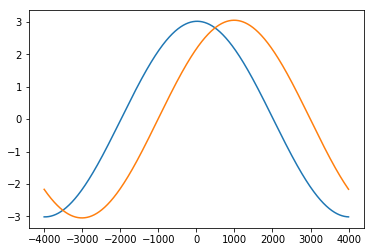

In [56]:
def plot_amp_phases(data1, srate):
    amplitude_estimates = np.zeros(srate)
    phases = range(-int(srate/2), int(srate/2))
    for k in phases: 
        data2 = sinusoid(440, 0.02,amp = 1.0, phase = k * (2 * np.pi / srate))
        amplitude_estimates[k+int(srate/2)] = amplitude_estimate(data1,data2)
    plt.plot(phases, amplitude_estimates)

srate = 8000
plt.figure()
k = 0  
data1 = sinusoid(440, 0.02,amp = 3.0, phase = k * (2 * np.pi / srate))
plot_amp_phases(data1, srate)
k = 1000 
data1 = sinusoid(440, 0.02,amp = 3.0, phase = k * (2 * np.pi / srate))
plot_amp_phases(data1, srate)

To summarize, we can estimate the amplitude of a sinusoidal signal if we know its frequency and phase by taking the inner product with a unit amplitude sinusoidal signal with the same frequency and phase. We can also estimate the phase if all we know is the frequency by forming multiple inner-product with different phases and selecting the one that gives the highest amplitude estimate.

Later, we will see how this approach can be used to reliably estimate the amplitude and phases of sinusoidal signals in the presence of interferring noise and other sinusoids. Understanding how inner products of sinusoidal signals work is fundamental in understanding how Discrete Fourier Transform works, which is arguably the most important algorithm in Digital Signal Processing.